전력 사용량 예측 AI 경진대회
--

전력 | 한국에너지공단 | 시계열 | SMAPE


train.csv :
train 데이터 : 60개 건물들의 2020년 6월 1일 부터 2020년 8월 24일까지의 데이터
1시간 단위로 제공
전력사용량(kWh) 포함
train.shape: (122400, 10)


test.csv :
test 데이터 : 60개 건물들의 2020년 8월 25일 부터 2020년 8월 31일까지의 데이터
3시간 단위로 제공(강수량의 경우 6시간 단위로 제공, 예보데이터)
전력사용량(kWh) 미포함
test.shape: (10080, 9)




sample_submission.csv :
sample_submission 데이터
sample_submission.shape: (10080, 2)


In [2]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

# home
train=pd.read_csv('C:/Users/bella/Desktop/빅데이터 분석수업자료/데이콘 전력사용량/energy/energy/train.csv', encoding='cp949', parse_dates=['date_time'])
test=pd.read_csv('C:/Users/bella/Desktop/빅데이터 분석수업자료/데이콘 전력사용량/energy/energy/test.csv', encoding='cp949', parse_dates=['date_time'])
sample_submission=pd.read_csv('C:/Users/bella/Desktop/빅데이터 분석수업자료/데이콘 전력사용량/energy/energy/sample_submission.csv', encoding='cp949', parse_dates=['num_date_time'])

#sd academy
#train=pd.read_csv('C:/Users/sundooedu/Desktop/빅데이터분석수업자료/전력사용량 데이콘/energy/energy/train.csv', encoding='cp949', parse_dates=['date_time'])
#test=pd.read_csv('C:/Users/sundooedu/Desktop/빅데이터분석수업자료/전력사용량 데이콘/energy/energy/test.csv', encoding='cp949', parse_dates=['date_time'])
#sample_submission=pd.read_csv('C:/Users/sundooedu/Desktop/빅데이터분석수업자료/전력사용량 데이콘/energy/energy/sample_submission.csv', encoding='cp949', parse_dates=['num_date_time'])

In [3]:
df_train=pd.DataFrame(train)
df_test=pd.DataFrame(test)
df_sample_submission=pd.DataFrame(sample_submission)

In [4]:
df_train

,num,date_time,전력사용량(kWh),기온(°C),풍속(m/s),습도(%),강수량(mm),일조(hr),비전기냉방설비운영,태양광보유
0,1,2020-06-01 00:00:00,8179.056,17.6,2.5,92.0,0.8,0.0,0.0,0.0
1,1,2020-06-01 01:00:00,8135.640,17.7,2.9,91.0,0.3,0.0,0.0,0.0
2,1,2020-06-01 02:00:00,8107.128,17.5,3.2,91.0,0.0,0.0,0.0,0.0
3,1,2020-06-01 03:00:00,8048.808,17.1,3.2,91.0,0.0,0.0,0.0,0.0
4,1,2020-06-01 04:00:00,8043.624,17.0,3.3,92.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
122395,60,2020-08-24 19:00:00,4114.368,27.8,2.3,68.0,0.0,0.7,1.0,1.0
122396,60,2020-08-24 20:00:00,3975.696,27.3,1.2,71.0,0.0,0.0,1.0,1.0
122397,60,2020-08-24 21:00:00,3572.208,27.3,1.8,71.0,0.0,0.0,1.0,1.0
122398,60,2020-08-24 22:00:00,3299.184,27.1,1.8,74.0,0.0,0.0,1.0,1.0


In [5]:
df_test

,num,date_time,기온(°C),풍속(m/s),습도(%),"강수량(mm, 6시간)","일조(hr, 3시간)",비전기냉방설비운영,태양광보유
0,1,2020-08-25 00:00:00,27.8,1.5,74.0,0.0,0.0,NaN,NaN
1,1,2020-08-25 01:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,2020-08-25 02:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1,2020-08-25 03:00:00,27.3,1.1,78.0,NaN,0.0,NaN,NaN
4,1,2020-08-25 04:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
10075,60,2020-08-31 19:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10076,60,2020-08-31 20:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10077,60,2020-08-31 21:00:00,27.9,4.1,68.0,NaN,0.0,1.0,1.0
10078,60,2020-08-31 22:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
df_sample_submission

,num_date_time,answer
0,1 2020-08-25 00,0
1,1 2020-08-25 01,0
2,1 2020-08-25 02,0
3,1 2020-08-25 03,0
4,1 2020-08-25 04,0
...,...,...
10075,60 2020-08-31 19,0
10076,60 2020-08-31 20,0
10077,60 2020-08-31 21,0
10078,60 2020-08-31 22,0


시간칼럼 분류
--

In [7]:
df_train['time'] = df_train['date_time'].dt.strftime('%m%d%H')
df_train['month_day'] = df_train['date_time'].dt.strftime('%m%d')
df_train['month']=df_train['date_time'].dt.strftime('%m')
df_train['date']=df_train['date_time'].dt.strftime('%d')
df_train['hour']=df_train['date_time'].dt.strftime('%H')
df_train['day']=df_train['date_time'].dt.strftime('%A')

df_test['time'] = df_test['date_time'].dt.strftime('%m%d%H')
df_test['month_day'] = df_test['date_time'].dt.strftime('%m%d')
df_test['month']=df_test['date_time'].dt.strftime('%m')
df_test['date']=df_test['date_time'].dt.strftime('%d')
df_test['hour']=df_test['date_time'].dt.strftime('%H')
df_test['day']=df_test['date_time'].dt.strftime('%A')

In [8]:
tn_month_day=pd.Series(df_train['month_day'], dtype=int)
tn_month=pd.Series(df_train['month'], dtype=int)
tn_date=pd.Series(df_train['date'], dtype=int)
tn_hour=pd.Series(df_train['hour'], dtype=int)
tn_time=pd.Series(df_train['time'], dtype=int)

te_month_day=pd.Series(df_test['month_day'], dtype=int)
te_month=pd.Series(df_test['month'], dtype=int)
te_date=pd.Series(df_test['date'], dtype=int)
te_hour=pd.Series(df_test['hour'], dtype=int)
te_time=pd.Series(df_test['time'], dtype=int)

df_train['month_day'] =tn_month_day
df_train['month']=tn_month
df_train['date']=tn_date
df_train['hour']=tn_hour
df_train['time']=tn_time

df_test['month_day']=te_month_day
df_test['month']=te_month
df_test['date']=te_date
df_test['hour']=te_hour
df_test['time']=te_time

In [9]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122400 entries, 0 to 122399
Data columns (total 16 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   num         122400 non-null  int64         
 1   date_time   122400 non-null  datetime64[ns]
 2   전력사용량(kWh)  122400 non-null  float64       
 3   기온(°C)      122400 non-null  float64       
 4   풍속(m/s)     122400 non-null  float64       
 5   습도(%)       122400 non-null  float64       
 6   강수량(mm)     122400 non-null  float64       
 7   일조(hr)      122400 non-null  float64       
 8   비전기냉방설비운영   122400 non-null  float64       
 9   태양광보유       122400 non-null  float64       
 10  time        122400 non-null  int32         
 11  month_day   122400 non-null  int32         
 12  month       122400 non-null  int32         
 13  date        122400 non-null  int32         
 14  hour        122400 non-null  int32         
 15  day         122400 non-null  object        
dtypes:

description

- num: 건물번호
- date_time: 시간
- 전력사용량(kWh)
- 전력사용량(kWh)  
- 기온(°C)     
- 풍속(m/s)    
- 습도(%)       
- 강수량(mm)  
- 일조(hr)    
- 비전기냉방설비운영   
- 태양광보유      

In [10]:
df_train.describe()

,num,전력사용량(kWh),기온(°C),풍속(m/s),습도(%),강수량(mm),일조(hr),비전기냉방설비운영,태양광보유,time,month_day,month,date,hour
count,122400.000000,122400.000000,122400.000000,122400.000000,122400.000000,122400.000000,122400.000000,122400.000000,122400.000000,122400.000000,122400.000000,122400.000000,122400.000000,122400.000000
mean,30.500000,2324.830866,24.251713,2.151641,80.169848,0.514989,0.213533,0.683333,0.483333,70789.147059,707.776471,6.929412,14.835294,11.500000
std,17.318173,2058.999326,3.407902,1.514475,15.525862,2.624505,0.370517,0.465178,0.499724,7871.284093,78.712810,0.793925,8.446192,6.922215
min,1.000000,0.000000,11.100000,0.000000,19.000000,0.000000,0.000000,0.000000,0.000000,60100.000000,601.000000,6.000000,1.000000,0.000000
25%,15.750000,1055.268000,21.800000,1.100000,70.000000,0.000000,0.000000,0.000000,0.000000,62205.750000,622.000000,6.000000,8.000000,5.750000
50%,30.500000,1700.352000,24.200000,1.900000,84.000000,0.000000,0.000000,1.000000,0.000000,71311.500000,713.000000,7.000000,15.000000,11.500000
75%,45.250000,2780.487000,26.500000,2.900000,93.000000,0.000000,0.300000,1.000000,1.000000,80317.250000,803.000000,8.000000,22.000000,17.250000
max,60.000000,17739.225000,36.300000,20.100000,100.000000,81.500000,1.000000,1.000000,1.000000,82423.000000,824.000000,8.000000,31.000000,23.000000


In [11]:
df_train.isna().sum()

num           0
date_time     0
전력사용량(kWh)    0
기온(°C)        0
풍속(m/s)       0
습도(%)         0
강수량(mm)       0
일조(hr)        0
비전기냉방설비운영     0
태양광보유         0
time          0
month_day     0
month         0
date          0
hour          0
day           0
dtype: int64

In [12]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10080 entries, 0 to 10079
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   num           10080 non-null  int64         
 1   date_time     10080 non-null  datetime64[ns]
 2   기온(°C)        3360 non-null   float64       
 3   풍속(m/s)       3360 non-null   float64       
 4   습도(%)         3360 non-null   float64       
 5   강수량(mm, 6시간)  1680 non-null   float64       
 6   일조(hr, 3시간)   3360 non-null   float64       
 7   비전기냉방설비운영     2296 non-null   float64       
 8   태양광보유         1624 non-null   float64       
 9   time          10080 non-null  int32         
 10  month_day     10080 non-null  int32         
 11  month         10080 non-null  int32         
 12  date          10080 non-null  int32         
 13  hour          10080 non-null  int32         
 14  day           10080 non-null  object        
dtypes: datetime64[ns](1), float64(7), in

In [13]:
df_test.describe()

,num,기온(°C),풍속(m/s),습도(%),"강수량(mm, 6시간)","일조(hr, 3시간)",비전기냉방설비운영,태양광보유,time,month_day,month,date,hour
count,10080.000000,3360.000000,3360.000000,3360.000000,1680.000000,3360.000000,2296.0,1624.0,10080.000000,10080.000000,10080.0,10080.000000,10080.00000
mean,30.500000,27.805804,2.440327,81.963095,2.191845,0.612917,1.0,1.0,82811.500000,828.000000,8.0,28.000000,11.50000
std,17.318961,2.378122,1.835905,11.900843,6.786772,0.929587,0.0,0.0,200.129683,2.000099,0.0,2.000099,6.92253
min,1.000000,22.100000,0.000000,44.000000,0.000000,0.000000,1.0,1.0,82500.000000,825.000000,8.0,25.000000,0.00000
25%,15.750000,26.000000,1.100000,74.000000,0.000000,0.000000,1.0,1.0,82617.750000,826.000000,8.0,26.000000,5.75000
50%,30.500000,27.500000,2.100000,83.000000,0.000000,0.000000,1.0,1.0,82811.500000,828.000000,8.0,28.000000,11.50000
75%,45.250000,29.200000,3.200000,92.000000,0.900000,1.000000,1.0,1.0,83005.250000,830.000000,8.0,30.000000,17.25000
max,60.000000,35.400000,22.500000,100.000000,83.500000,3.000000,1.0,1.0,83123.000000,831.000000,8.0,31.000000,23.00000


In [14]:
df_test.isna().sum()

num                0
date_time          0
기온(°C)          6720
풍속(m/s)         6720
습도(%)           6720
강수량(mm, 6시간)    8400
일조(hr, 3시간)     6720
비전기냉방설비운영       7784
태양광보유           8456
time               0
month_day          0
month              0
date               0
hour               0
day                0
dtype: int64

In [15]:
df_sample_submission

,num_date_time,answer
0,1 2020-08-25 00,0
1,1 2020-08-25 01,0
2,1 2020-08-25 02,0
3,1 2020-08-25 03,0
4,1 2020-08-25 04,0
...,...,...
10075,60 2020-08-31 19,0
10076,60 2020-08-31 20,0
10077,60 2020-08-31 21,0
10078,60 2020-08-31 22,0


In [16]:
df_sample_submission.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10080 entries, 0 to 10079
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   num_date_time  10080 non-null  object
 1   answer         10080 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 157.6+ KB


In [17]:
df_sample_submission.iloc[0]

num_date_time    1 2020-08-25 00
answer                         0
Name: 0, dtype: object

In [18]:
i=0
company_num=[]

for i in range(0,10080):
    company=df_sample_submission.iloc[i].str.split('2020').str[0].values[0]
    company_num.append(company)
    i+=1

In [19]:
company_num=pd.Series(company_num)

In [20]:
df_sample_submission['num']=company_num
df_sample_submission

,num_date_time,answer,num
0,1 2020-08-25 00,0,1
1,1 2020-08-25 01,0,1
2,1 2020-08-25 02,0,1
3,1 2020-08-25 03,0,1
4,1 2020-08-25 04,0,1
...,...,...,...
10075,60 2020-08-31 19,0,60
10076,60 2020-08-31 20,0,60
10077,60 2020-08-31 21,0,60
10078,60 2020-08-31 22,0,60


In [21]:
i=0
time_d=[]

for i in range(0,10080):
    t1=len(df_sample_submission.iloc[i].str.split('2020').str[0].values[0])
    t2=df_sample_submission.iloc[i, 0][t1:]
    time_d.append(t2)
    i+=1

In [22]:
time_d=pd.Series(time_d)
df_sample_submission['time']=time_d
df_sample_submission

,num_date_time,answer,num,time
0,1 2020-08-25 00,0,1,2020-08-25 00
1,1 2020-08-25 01,0,1,2020-08-25 01
2,1 2020-08-25 02,0,1,2020-08-25 02
3,1 2020-08-25 03,0,1,2020-08-25 03
4,1 2020-08-25 04,0,1,2020-08-25 04
...,...,...,...,...
10075,60 2020-08-31 19,0,60,2020-08-31 19
10076,60 2020-08-31 20,0,60,2020-08-31 20
10077,60 2020-08-31 21,0,60,2020-08-31 21
10078,60 2020-08-31 22,0,60,2020-08-31 22


In [23]:
df_sample_submission.num.unique()

array(['1 ', '2 ', '3 ', '4 ', '5 ', '6 ', '7 ', '8 ', '9 ', '10 ', '11 ',
       '12 ', '13 ', '14 ', '15 ', '16 ', '17 ', '18 ', '19 ', '20 ',
       '21 ', '22 ', '23 ', '24 ', '25 ', '26 ', '27 ', '28 ', '29 ',
       '30 ', '31 ', '32 ', '33 ', '34 ', '35 ', '36 ', '37 ', '38 ',
       '39 ', '40 ', '41 ', '42 ', '43 ', '44 ', '45 ', '46 ', '47 ',
       '48 ', '49 ', '50 ', '51 ', '52 ', '53 ', '54 ', '55 ', '56 ',
       '57 ', '58 ', '59 ', '60 '], dtype=object)

In [24]:
df_sample_submission.time.unique()

array(['2020-08-25 00', '2020-08-25 01', '2020-08-25 02', '2020-08-25 03',
       '2020-08-25 04', '2020-08-25 05', '2020-08-25 06', '2020-08-25 07',
       '2020-08-25 08', '2020-08-25 09', '2020-08-25 10', '2020-08-25 11',
       '2020-08-25 12', '2020-08-25 13', '2020-08-25 14', '2020-08-25 15',
       '2020-08-25 16', '2020-08-25 17', '2020-08-25 18', '2020-08-25 19',
       '2020-08-25 20', '2020-08-25 21', '2020-08-25 22', '2020-08-25 23',
       '2020-08-26 00', '2020-08-26 01', '2020-08-26 02', '2020-08-26 03',
       '2020-08-26 04', '2020-08-26 05', '2020-08-26 06', '2020-08-26 07',
       '2020-08-26 08', '2020-08-26 09', '2020-08-26 10', '2020-08-26 11',
       '2020-08-26 12', '2020-08-26 13', '2020-08-26 14', '2020-08-26 15',
       '2020-08-26 16', '2020-08-26 17', '2020-08-26 18', '2020-08-26 19',
       '2020-08-26 20', '2020-08-26 21', '2020-08-26 22', '2020-08-26 23',
       '2020-08-27 00', '2020-08-27 01', '2020-08-27 02', '2020-08-27 03',
       '2020-08-27 04', '

EDA 1
--

전력사용량 기준  EDA
--

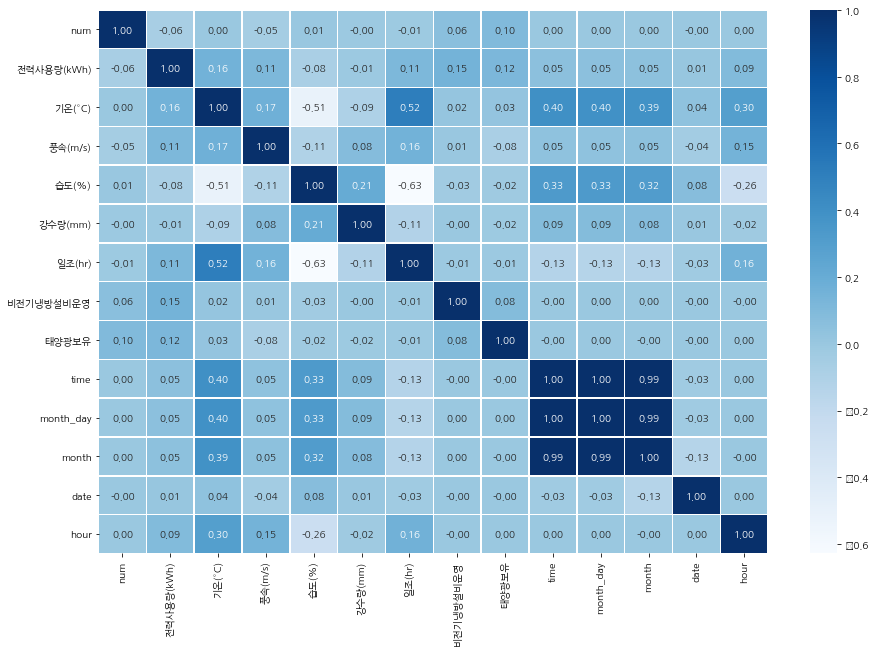

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams['font.family'] = 'NanumGothic'
plt.figure(figsize=(15,10))
sns.heatmap(data=df_train.corr(), annot=True, fmt ='.2f', linewidths=.5, cmap='Blues')
plt.show()

In [26]:
df_train.columns

Index(['num', 'date_time', '전력사용량(kWh)', '기온(°C)', '풍속(m/s)', '습도(%)',
       '강수량(mm)', '일조(hr)', '비전기냉방설비운영', '태양광보유', 'time', 'month_day', 'month',
       'date', 'hour', 'day'],
      dtype='object')

시간과 전력사용량 관계
--

[Text(0, 0.5, 'kWh'), Text(0.5, 1.0, 'month')]

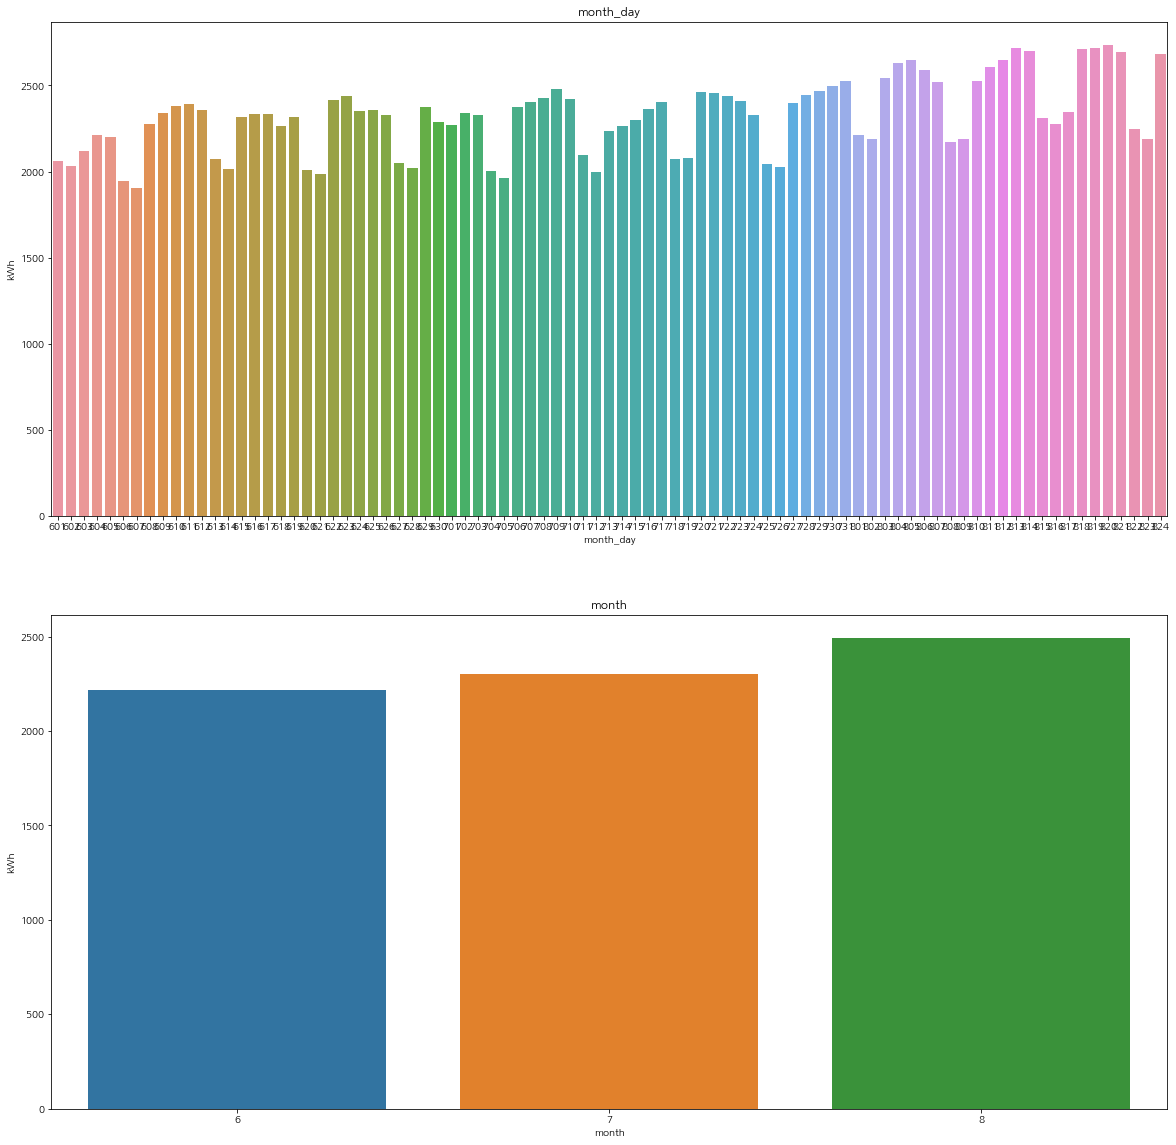

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt

figure, ((ax1), (ax2)) =plt.subplots(nrows=2,ncols=1)
figure.set_size_inches(20,20)

md=df_train.groupby('month_day')['전력사용량(kWh)'].mean().reset_index()
m=df_train.groupby('month')['전력사용량(kWh)'].mean().reset_index()

sns.barplot(data=md, x="month_day", y='전력사용량(kWh)', ax=ax1)

sns.barplot(data=m, x="month", y='전력사용량(kWh)', ax=ax2)

sns.set_style("darkgrid")
ax1.set(ylabel='kWh', title ="month_day")
ax2.set(ylabel='kWh', title ="month")

[Text(0, 0.5, 'kWh'), Text(0.5, 1.0, 'hour')]

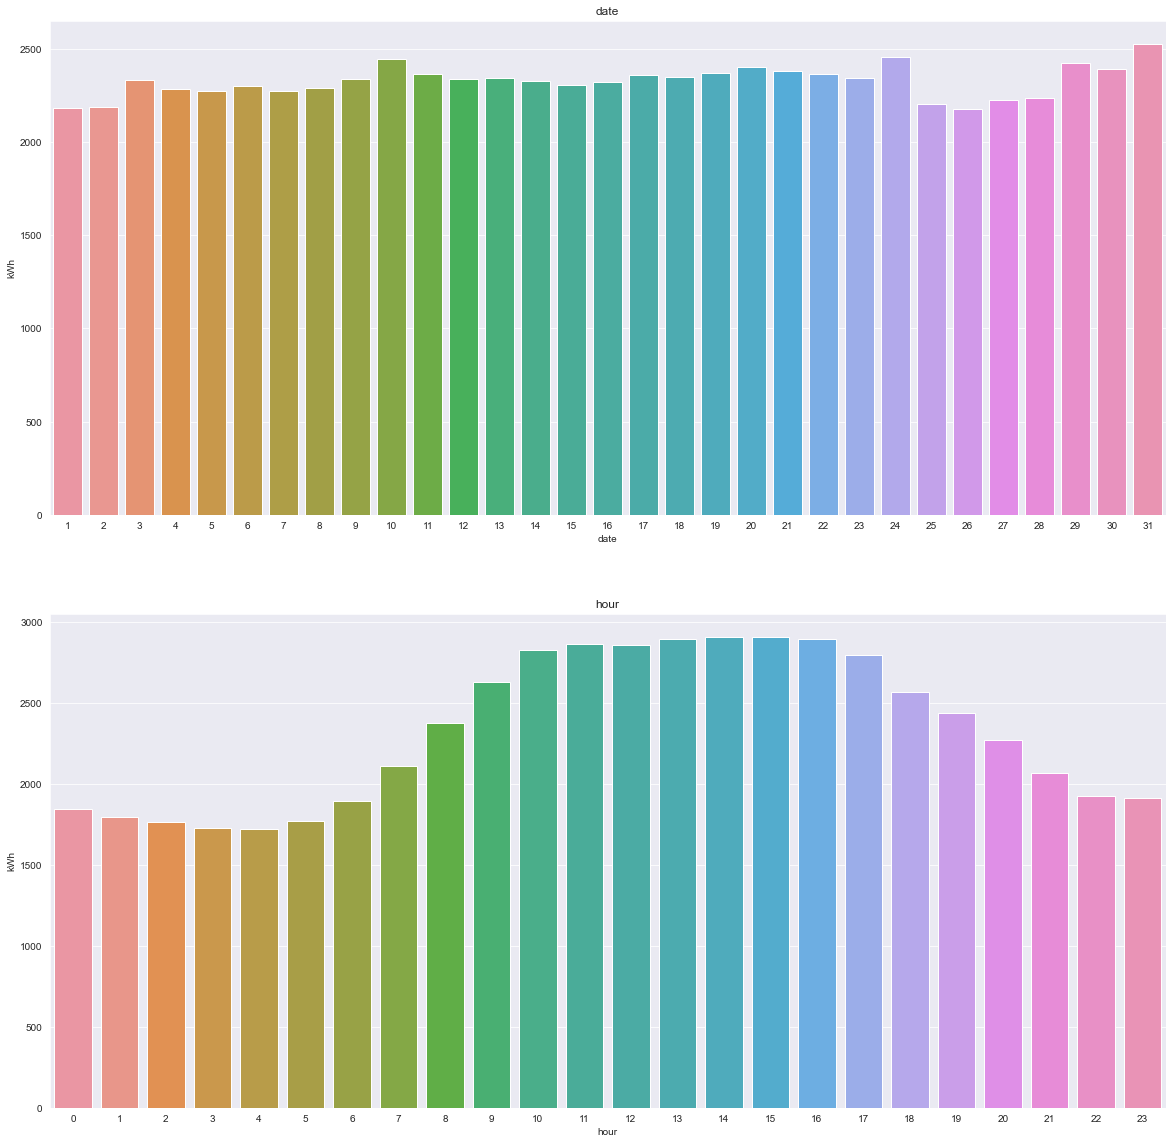

In [28]:
import seaborn as sns

figure, ( (ax3), (ax4)) =plt.subplots(nrows=2,ncols=1)
figure.set_size_inches(20,20)

date=df_train.groupby('date')['전력사용량(kWh)'].mean().reset_index()
h=df_train.groupby('hour')['전력사용량(kWh)'].mean().reset_index()

sns.barplot(data=date, x="date", y='전력사용량(kWh)', ax=ax3)

sns.barplot(data=h, x="hour", y='전력사용량(kWh)', ax=ax4)

ax3.set(ylabel='kWh', title ="date")
ax4.set(ylabel='kWh', title ="hour")

[Text(0, 0.5, 'kWh'), Text(0.5, 1.0, 'day')]

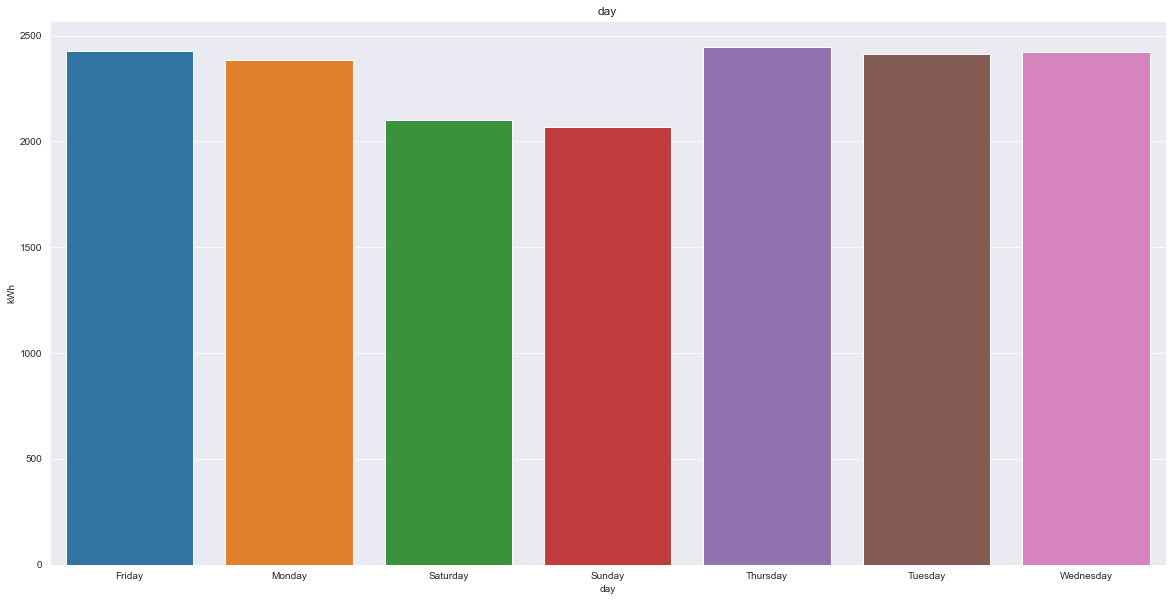

In [29]:
import seaborn as sns

figure, (ax5) =plt.subplots(nrows=1,ncols=1)
figure.set_size_inches(20,10)

day=df_train.groupby('day')['전력사용량(kWh)'].mean().reset_index()

sns.barplot(data=day, x="day", y='전력사용량(kWh)', ax=ax5)

sns.set_style("darkgrid")
ax5.set(ylabel='kWh', title ="day")

<AxesSubplot:xlabel='month_day', ylabel='전력사용량(kWh)'>

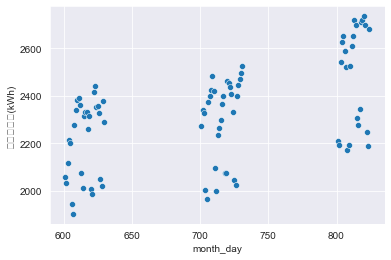

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.scatterplot(md.month_day, md['전력사용량(kWh)'])

기온과 전력사용량 관계
--

In [31]:
tem=df_train.groupby(['기온(°C)'])['전력사용량(kWh)' ].mean().reset_index()
tem

,기온(°C),전력사용량(kWh)
0,11.1,672.624
1,11.2,848.880
2,11.3,721.224
3,11.7,482.220
4,11.8,473.364
...,...,...
240,35.6,1767.312
241,35.7,1554.282
242,35.8,1748.304
243,36.0,1505.088


<AxesSubplot:xlabel='기온(°C)', ylabel='전력사용량(kWh)'>

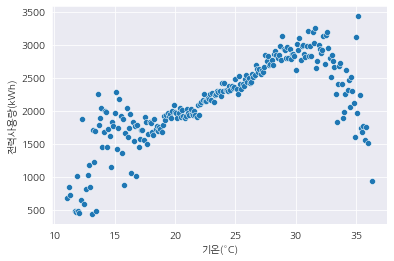

In [32]:
plt.rcParams['font.family'] = 'NanumGothic'

sns.scatterplot(tem['기온(°C)'],tem['전력사용량(kWh)'])

비전기냉방설비운영과 전력사용량 관계
--

In [33]:
Non_electric_cooling_equipment=df_train.groupby(['비전기냉방설비운영'])['전력사용량(kWh)' ].mean().reset_index()
Non_electric_cooling_equipment

,비전기냉방설비운영,전력사용량(kWh)
0,0.0,1868.722163
1,1.0,2536.198313


[Text(0, 0.5, 'kWH'), Text(0.5, 1.0, 'kWh and Non_electric_cooling_equipment')]

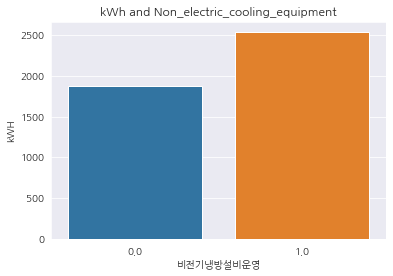

In [34]:
figure, (ax1) =plt.subplots(nrows=1,ncols=1)

plt.rcParams['font.family'] = 'NanumGothic'
sns.barplot(data=Non_electric_cooling_equipment, x='비전기냉방설비운영', y='전력사용량(kWh)', ax=ax1)

ax1.set(ylabel='kWH', title='kWh and Non_electric_cooling_equipment')

태양광보유와 전력사용량 관계
--

In [35]:
sunlight=df_train.groupby(['태양광보유'])['전력사용량(kWh)' ].mean().reset_index()
sunlight

,태양광보유,전력사용량(kWh)
0,0.0,2093.135722
1,1.0,2572.504986


[Text(0, 0.5, 'kWH'), Text(0.5, 1.0, 'kWh and sunlight')]

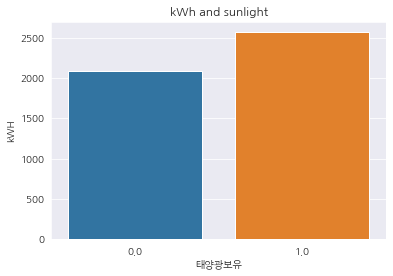

In [36]:
figure, (ax1) =plt.subplots(nrows=1,ncols=1)
plt.rcParams['font.family'] = 'NanumGothic'

sns.barplot(data=sunlight, x='태양광보유', y='전력사용량(kWh)', ax=ax1)

ax1.set(ylabel='kWH', title='kWh and sunlight')

나머지 변수들의 상관관계
--

건물번호와 전력사용량 관계
--

In [37]:
building_num=df_train.groupby(['num'])['전력사용량(kWh)'].sum().reset_index()

[Text(0, 0.5, 'kWH'), Text(0.5, 1.0, 'num and kWh')]

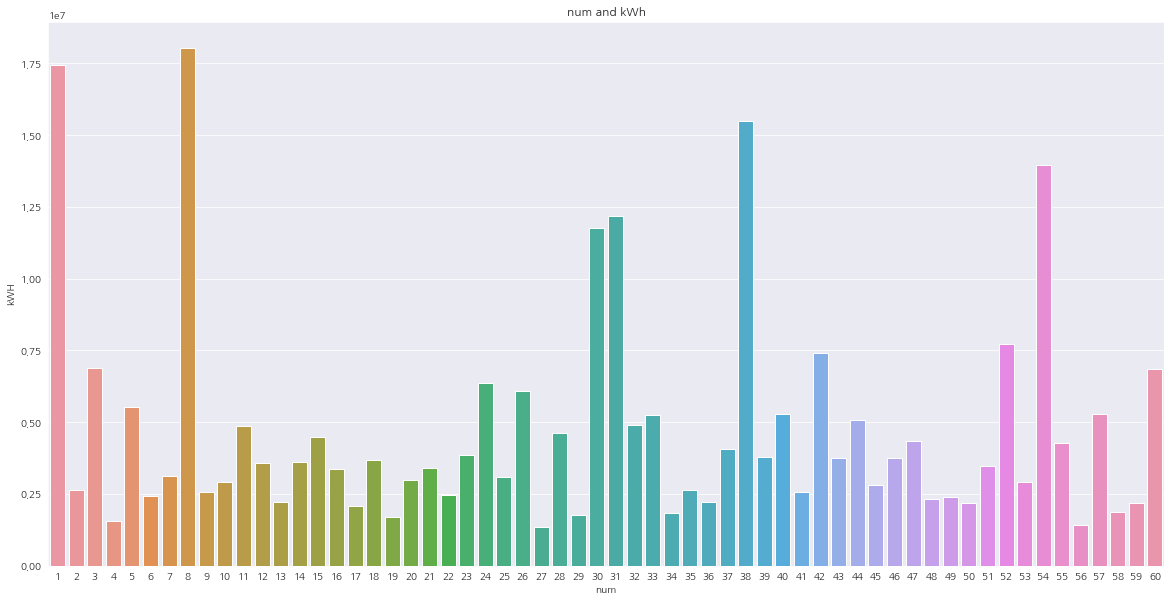

In [38]:
figure, (ax1) =plt.subplots(nrows=1,ncols=1)
figure.set_size_inches(20,10)

sns.barplot(data=building_num, x='num', y='전력사용량(kWh)', ax=ax1)

ax1.set(ylabel='kWH', title='num and kWh')

날짜와 시간 기준
--

In [39]:
tn1=df_train.groupby(['time'])['풍속(m/s)', '습도(%)',
       '강수량(mm)', '일조(hr)','전력사용량(kWh)'].mean().reset_index()

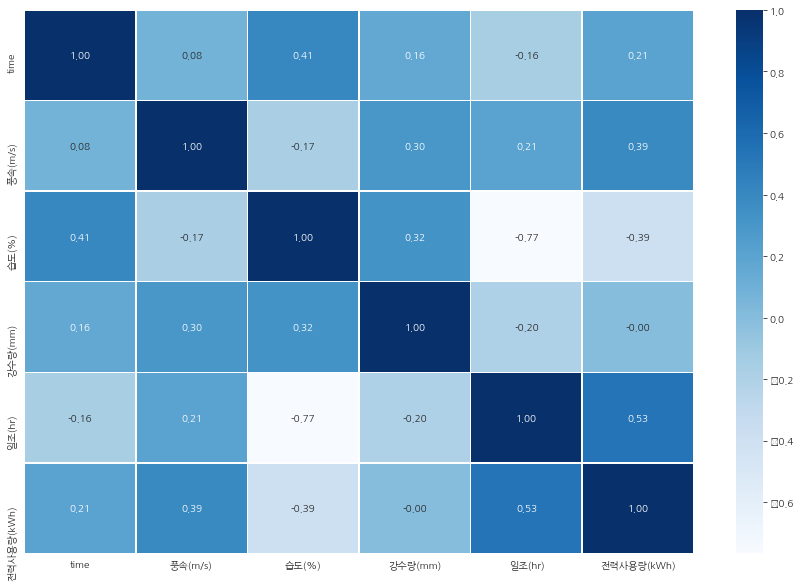

In [40]:
plt.figure(figsize=(15,10))
plt.rcParams['font.family'] = 'NanumGothic'
sns.heatmap(data=tn1.corr(), annot=True, fmt ='.2f', linewidths=.5, cmap='Blues')
plt.show()

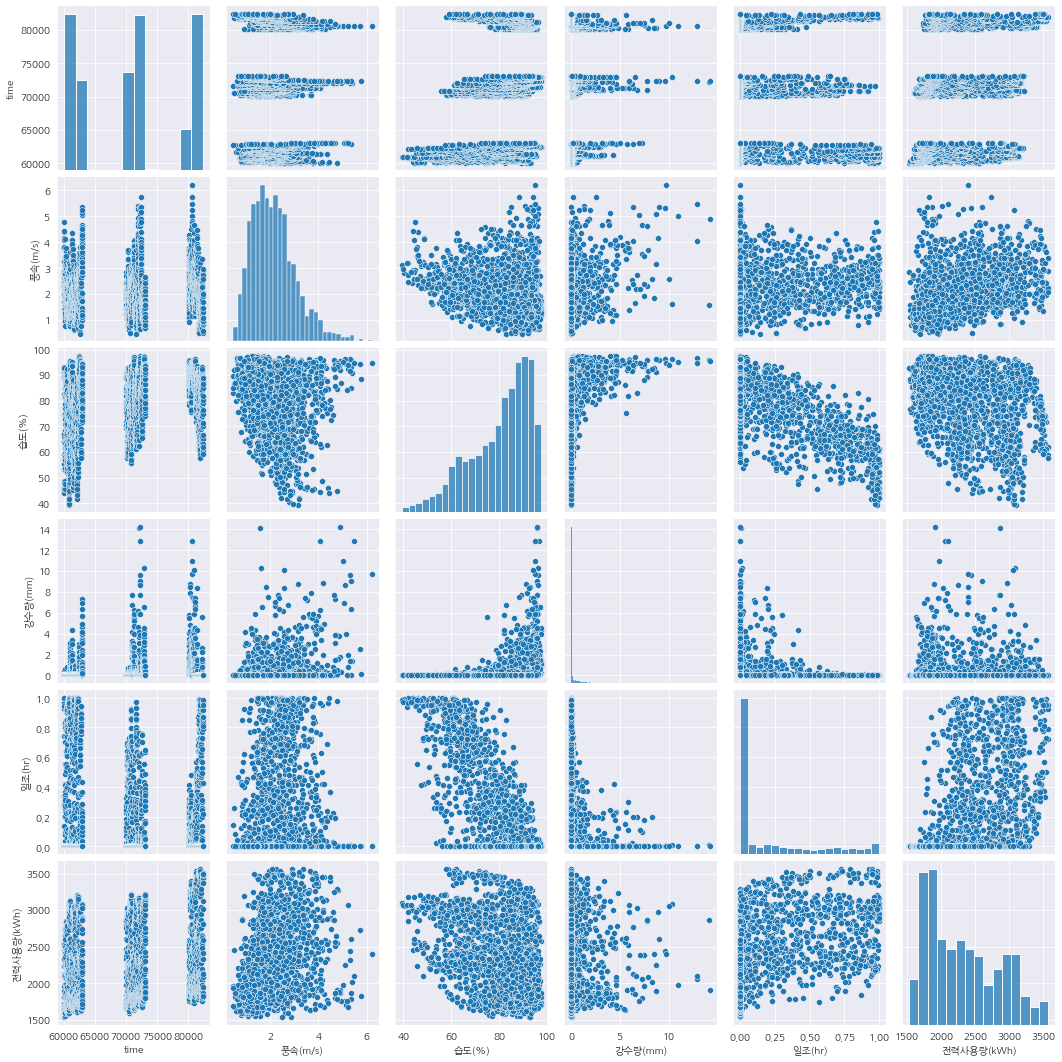

In [41]:
sns.pairplot(tn1)
plt.rcParams['font.family'] = 'NanumGothic'

회사별로 비교해보기
--

In [42]:
df_train.columns

Index(['num', 'date_time', '전력사용량(kWh)', '기온(°C)', '풍속(m/s)', '습도(%)',
       '강수량(mm)', '일조(hr)', '비전기냉방설비운영', '태양광보유', 'time', 'month_day', 'month',
       'date', 'hour', 'day'],
      dtype='object')

In [43]:
num_info=df_train.groupby(['num'])['기온(°C)','전력사용량(kWh)','풍속(m/s)','습도(%)','강수량(mm)',  '비전기냉방설비운영', '태양광보유'].mean().reset_index()
num_info.head()

,num,기온(°C),전력사용량(kWh),풍속(m/s),습도(%),강수량(mm),비전기냉방설비운영,태양광보유
0,1,24.608578,8543.273488,2.345980,75.971569,0.493873,0.0,0.0
1,2,23.623333,1299.914365,3.197990,81.113725,0.720098,1.0,0.0
2,3,24.241275,3371.353699,1.937402,82.667157,0.540882,1.0,1.0
3,4,25.143627,763.997353,2.056324,71.136275,0.393186,1.0,1.0
4,5,23.623333,2714.509694,3.197990,81.113725,0.720098,1.0,0.0


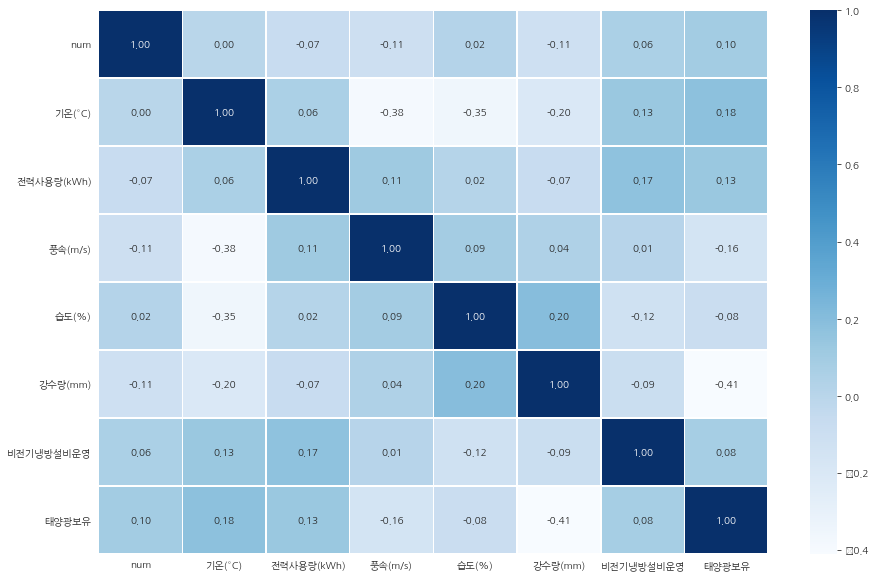

In [44]:
plt.figure(figsize=(15,10))
plt.rcParams['font.family'] = 'NanumGothic'
sns.heatmap(data=num_info.corr(), annot=True, fmt ='.2f', linewidths=.5, cmap='Blues')
plt.show()

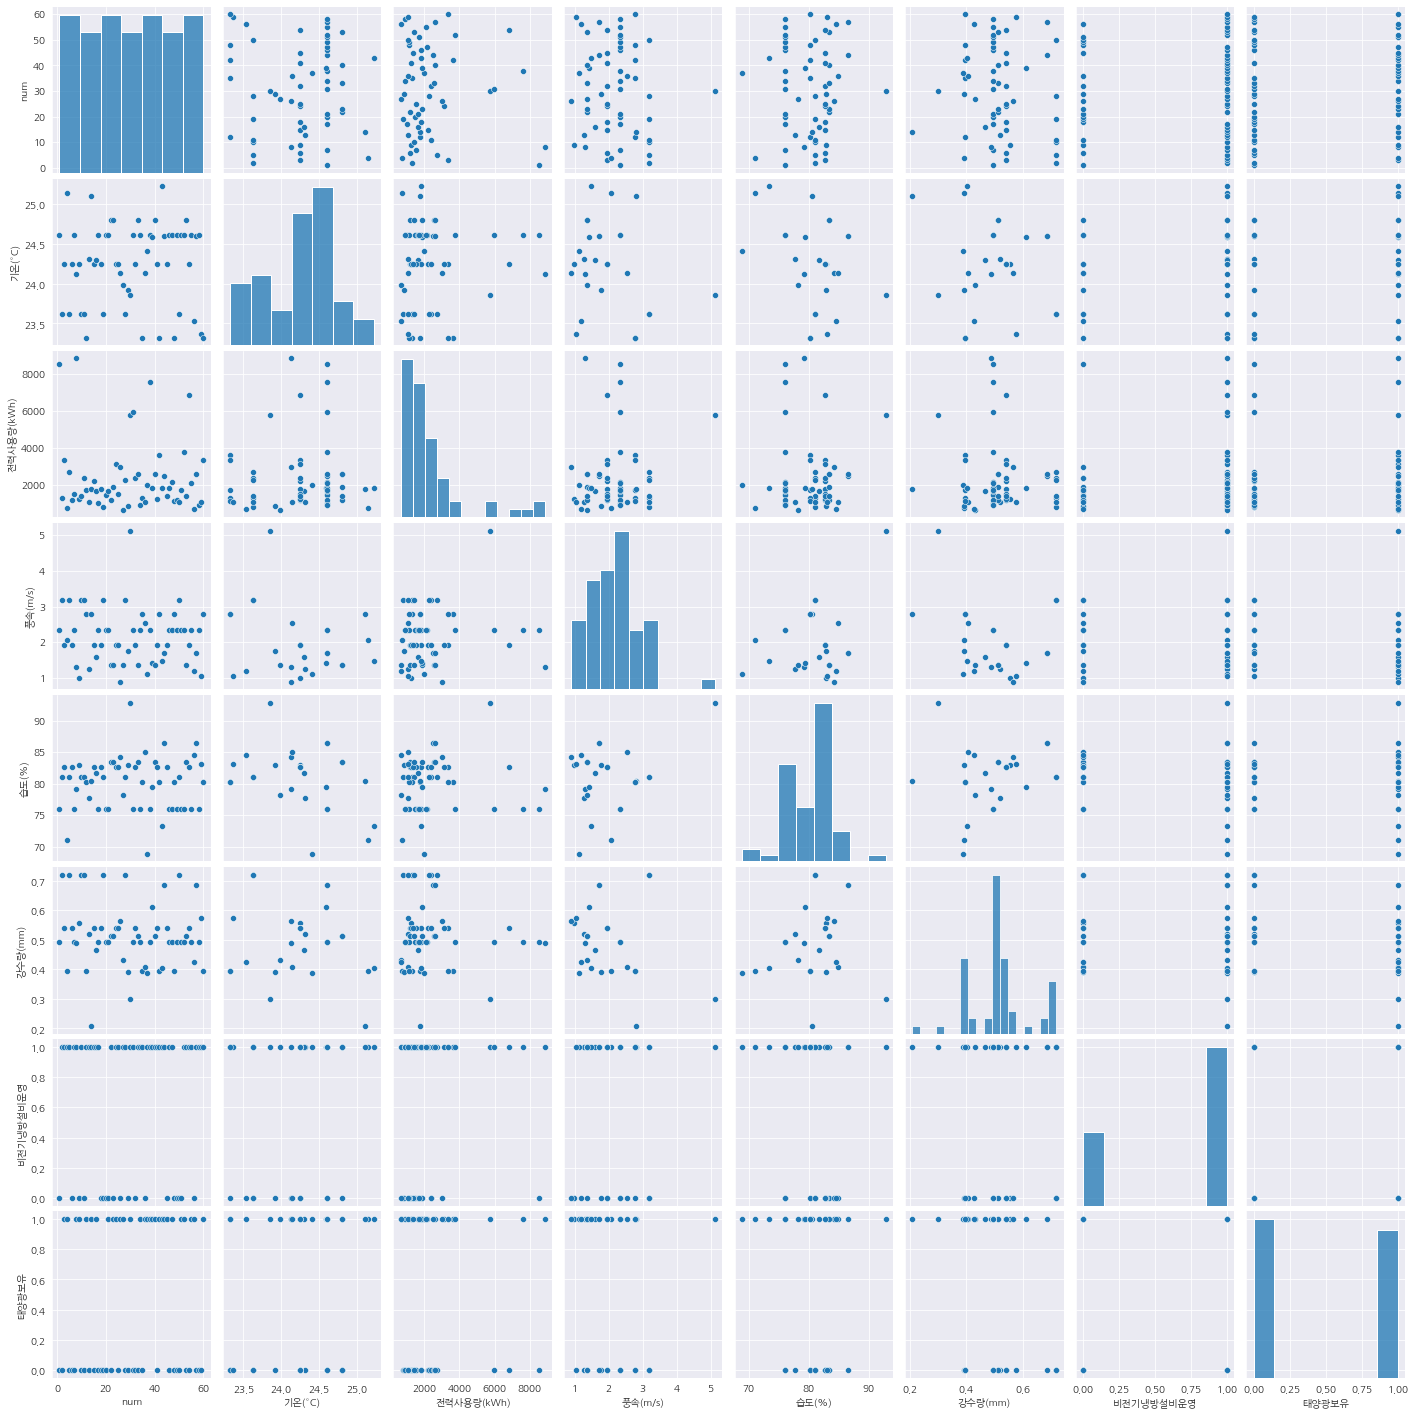

In [45]:
sns.pairplot(num_info)
plt.rcParams['font.family'] = 'NanumGothic'

Linear Regression
--

- train 데이터를 기준으로 마지막 7일 이전을 train, 마지막 7일을 test로 설정해준 뒤
- train 데이터와 test 데이터로 회귀분석을 진행합니다.

day label encoding

In [85]:
from sklearn import preprocessing

le=preprocessing.LabelEncoder()

df_train_encoded_day=le.fit_transform(df_train['day'])
np_day=df_train_encoded_day.reshape(-1,1)
day_1=map(lambda x: x[0], np_day)
day=pd.Series(day_1)

df_train['day']=day

In [86]:
from sklearn import preprocessing

le=preprocessing.LabelEncoder()

df_test_encoded_day=le.fit_transform(df_test['day'])
np_day=df_test_encoded_day.reshape(-1,1)
day_1=map(lambda x: x[0], np_day)
day=pd.Series(day_1)

df_test['day']=day

In [108]:
X=df_train.drop(['date_time', '전력사용량(kWh)'], axis=1)
y=df_train['전력사용량(kWh)']

train_1=df_train.loc[df_train['time']<=81723]
test_1=df_train.loc[df_train['time']>81723]
train_2=train_1.drop(['date_time'], axis=1)
test_2=test_1.drop(['date_time'],  axis=1)

train=train_2.drop(['전력사용량(kWh)'], axis=1)
test=test_2.drop(['전력사용량(kWh)'],  axis=1)
y_train=train_2['전력사용량(kWh)']
y_test=test_2['전력사용량(kWh)']

In [109]:
X_train=train
X_test=test

모델 적용해보기

In [110]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import mean_squared_error

reg_all=LinearRegression()
reg_all.fit(X_train, y_train)

LinearRegression()

In [111]:
import numpy as np

y_train_pred=reg_all.predict(X_train)
rmse=(np.sqrt(mean_squared_error(y_train, y_train_pred)))
r2=round(reg_all.score(X_train, y_train), 2)

print('rmse 는', format(rmse), '입니다.')
print('r2 는', format(r2), '입니다.')
print('train 스코어는', format(reg_all.score(X_train, y_train)), '입니다.')

rmse 는 1962.5857866847173 입니다.
r2 는 0.07 입니다.
train 스코어는 0.07405798886950676 입니다.


In [112]:
y_test_pred=reg_all.predict(X_test)
rmse=(np.sqrt(mean_squared_error(y_test, y_test_pred)))
r2=round(reg_all.score(X_test, y_test), 2)

print('rmse 점수는', format(rmse), '입니다.')
print('r2 점수는', format(r2), '입니다.')
print('test 스코어는', format(reg_all.score(X_test, y_test)), '입니다.')

rmse 점수는 2153.4419250532155 입니다.
r2 점수는 0.08 입니다.
test 스코어는 0.0839636988481508 입니다.


In [113]:
import statsmodels.api as sm

# 변수들에 상수항을 추가함
X_constant=sm.add_constant(X)

model_1=sm.OLS(y,X_constant)
lin_reg=model_1.fit()
lin_reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             전력사용량(kWh)   R-squared:                       0.076
Model:                            OLS   Adj. R-squared:                  0.076
Method:                 Least Squares   F-statistic:                     842.7
Date:                Wed, 19 May 2021   Prob (F-statistic):               0.00
Time:                        20:57:05   Log-Likelihood:            -1.1027e+06
No. Observations:              122400   AIC:                         2.205e+06
Df Residuals:                  122387   BIC:                         2.206e+06
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -918.2959     73.890    -12.428      0.000   -1063.119    -773.473
num           -9.3569      0.329    -28.433      0.000     -10.002      -8.712
기온(°C)        75.4972      2.936     25.718      0.000      69.743      81.251
풍속(m/s)      115.1868      3.874     29.735      0.000     107.594     122.779
습도(%)          7.5567      0.620     12.182      0.000       6.341       8.773
강수량(mm)       -2.0487      2.218     -0.924      0.356      -6.397       2.299
일조(hr)       349.9067     20.899     16.743      0.000     308.945     390.869
비전기냉방설비운영    641.4528     12.236     52.425      0.000     617.471     665.435
태양광보유        481.1327     11.455     42.003      0.000     458.681     503.584
time          -0.0009      0.001     -0.837      0.403      -0.003       0.001
month_day     -0.1355      0.009    -15.503      0.000      -0.153      -0.118
month         -0.0233      0.007     -3.395      0.001      -0.037      -0.010
date           2.1967      0.687      3.198      0.001       0.850       3.543
hour          13.5496      0.874     15.499      0.000      11.836      15.263
day           24.2586      2.838      8.547      0.000      18.696      29.821
==============================================================================
Omnibus:                    66710.759   Durbin-Watson:                   0.030
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           529088.674
Skew:                           2.555   Prob(JB):                         0.00
Kurtosis:                      11.811   Cond. No.                     1.14e+20
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 4.77e-26. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [116]:
coeff = pd.Series(data=np.round(reg_all.coef_, 1), index=X.columns )
coeff.sort_values(ascending=False)

비전기냉방설비운영    638.8
태양광보유        469.6
일조(hr)       291.4
풍속(m/s)      113.1
기온(°C)        76.2
day           25.2
hour          13.5
습도(%)          7.0
date           1.6
month         -0.0
time          -0.0
month_day     -0.1
강수량(mm)       -2.0
num           -9.4
dtype: float64

Text(0.5, 1.0, 'Feature Coeff')

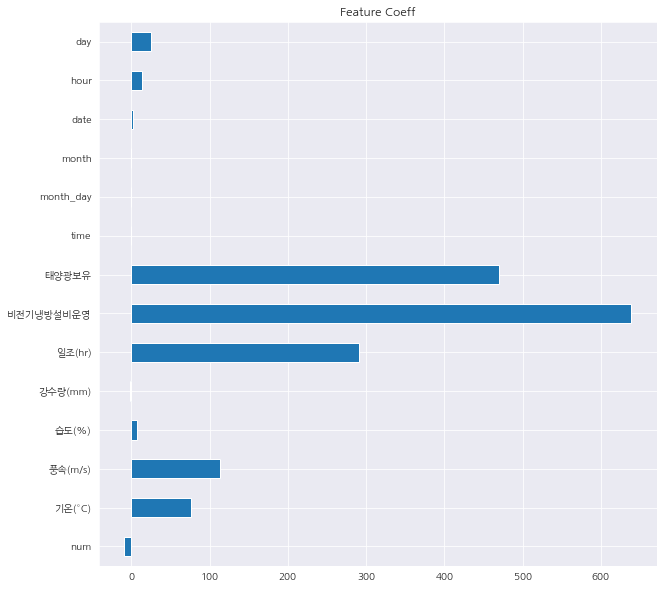

In [117]:
fia, ax=plt.subplots(figsize=(10,10))
coeff.plot.barh()

ax.set_title("Feature Coeff")

EDA 2: pivot table
--

날짜 정보와 날씨 기준 EDA
--

날짜 정보: 'time', 'month_day', 'month', 'date', 'hour', 'day'

날씨 정보:  '기온(°C)',  '풍속(m/s)',  '습도(%)',  '강수량(mm)', '일조(hr)'

회사별로 날짜 별 기온 확인해보기
--

In [166]:
tem_table=pd.pivot_table(df_train, index='num'  , columns='month_day'  , values= '기온(°C)')
tem_table=tem_table.fillna(0)
tem_table.describe()

month_day,601,602,603,604,605,606,607,608,609,610,...,815,816,817,818,819,820,821,822,823,824
count,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,...,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000
mean,20.300417,18.881736,21.701111,22.760625,22.872569,23.151736,22.317708,24.224028,25.700764,25.429653,...,27.450556,27.813194,28.184514,27.785903,27.619931,27.924792,27.169097,25.727361,26.017639,27.634097
std,1.532636,1.561297,0.892132,1.832348,1.734588,1.437018,1.278749,1.143025,1.242311,0.949437,...,1.570301,0.885985,0.637076,0.932316,1.075958,0.923821,0.783692,1.016421,1.015121,0.671312
min,17.600000,16.720833,19.816667,18.991667,19.945833,19.870833,19.845833,21.058333,23.204167,22.666667,...,25.241667,26.208333,26.462500,26.179167,26.029167,26.525000,25.487500,24.400000,24.200000,26.033333
25%,19.091667,17.841667,21.291667,21.908333,21.562500,21.870833,21.387500,23.225000,24.651042,24.625000,...,26.100000,27.383333,28.183333,26.945833,26.645833,27.400000,26.608333,24.893750,25.020833,27.441667
50%,19.841667,17.900000,21.716667,22.316667,22.862500,23.150000,22.852083,24.200000,25.606250,25.466667,...,26.708333,27.575000,28.258333,27.541667,27.145833,27.554167,26.954167,25.462500,25.570833,27.529167
75%,21.432292,19.907292,21.841667,24.493750,24.104167,24.583333,22.879167,24.775000,26.604167,26.066667,...,28.767708,28.389583,28.416667,28.591667,28.837500,28.944792,27.437500,26.751042,26.958333,27.920833
max,23.962500,22.416667,24.137500,27.433333,26.416667,25.395833,24.508333,26.483333,28.683333,28.070833,...,31.737500,30.437500,29.641667,29.945833,30.458333,29.862500,29.133333,27.758333,28.120833,29.908333


In [167]:
tem_table.head()

month_day,601,602,603,604,605,606,607,608,609,610,...,815,816,817,818,819,820,821,822,823,824
num,,,,,,,,,,,,,,,,,,,,,
1,19.841667,17.900000,21.841667,21.908333,22.862500,24.583333,22.870833,24.775000,26.604167,26.066667,...,26.100000,27.383333,28.258333,27.541667,27.145833,27.554167,26.608333,24.400000,25.020833,27.529167
2,21.920833,21.212500,21.291667,22.620833,22.287500,21.004167,21.387500,23.225000,23.716667,24.625000,...,27.900000,28.062500,28.404167,28.591667,28.837500,29.437500,26.883333,26.858333,26.958333,27.920833
3,19.091667,17.841667,21.716667,22.316667,21.562500,23.150000,21.666667,23.854167,25.445833,25.466667,...,26.708333,27.575000,28.183333,26.945833,26.645833,27.400000,27.437500,25.462500,25.570833,27.441667
4,23.962500,22.416667,24.137500,27.433333,26.416667,21.233333,23.341667,26.483333,28.683333,28.070833,...,31.737500,30.437500,29.641667,29.945833,30.458333,29.862500,27.245833,26.879167,28.120833,28.562500
5,21.920833,21.212500,21.291667,22.620833,22.287500,21.004167,21.387500,23.225000,23.716667,24.625000,...,27.900000,28.062500,28.404167,28.591667,28.837500,29.437500,26.883333,26.858333,26.958333,27.920833


각 회사마다 지역에 따라 해당 날짜 온도 차이가 있음을 확인. 향후 지역별로 군집화 할 때 좋은 자료가 될 수도 있을 것이라고 추정

일교차 확인해보기
--

In [172]:
tem_table2=pd.pivot_table(df_train, index='hour'  , columns='month_day'  , values= '기온(°C)')
tem_table2=tem_table2.fillna(0)
tem_table2.describe()

month_day,601,602,603,604,605,606,607,608,609,610,...,815,816,817,818,819,820,821,822,823,824
count,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,...,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000
mean,20.300417,18.881736,21.701111,22.760625,22.872569,23.151736,22.317708,24.224028,25.700764,25.429653,...,27.450556,27.813194,28.184514,27.785903,27.619931,27.924792,27.169097,25.727361,26.017639,27.634097
std,2.642281,2.641877,3.088673,2.399268,2.914447,3.436759,2.949944,4.125147,4.277550,3.342833,...,1.220160,2.145953,2.321296,2.569630,2.732493,2.697862,2.042250,1.333538,2.618341,2.889437
min,17.285000,14.825000,18.040000,20.211667,19.421667,18.758333,18.816667,19.055000,19.473333,21.340000,...,25.766667,25.081667,25.525000,24.558333,24.196667,24.783333,24.436667,23.575000,22.778333,23.900000
25%,17.878750,16.147500,18.651250,20.558750,20.364583,19.812083,19.750417,19.761250,21.690000,22.603750,...,26.580000,26.048750,26.175833,25.499583,25.235417,25.446667,25.420833,24.922500,23.276667,24.427500
50%,19.437500,19.676667,21.177500,22.062500,21.944167,22.843333,21.430000,23.994167,25.625000,24.209167,...,27.105000,27.232500,27.425833,27.172500,26.942500,27.336667,26.885000,25.520000,25.646667,27.630833
75%,23.022917,20.770833,24.435000,24.806667,25.644167,26.082083,24.995833,28.189167,29.932500,28.650000,...,28.628750,29.749583,30.636250,30.206667,30.370417,30.385000,29.141667,26.263750,28.755000,30.313750
max,24.235000,22.665000,26.665000,27.096667,27.565000,28.441667,27.413333,30.240000,31.743333,30.890000,...,29.413333,31.163333,31.881667,31.906667,31.673333,32.180000,30.420000,28.681667,30.005000,31.565000


In [173]:
tem_table2.head()

month_day,601,602,603,604,605,606,607,608,609,610,...,815,816,817,818,819,820,821,822,823,824
hour,,,,,,,,,,,,,,,,,,,,,
0,18.313333,16.598333,18.876667,20.565000,20.638333,20.186667,20.251667,19.870000,22.156667,23.661667,...,26.851667,26.326667,26.518333,25.973333,25.675000,25.820000,25.870000,25.778333,23.451667,24.648333
1,18.125000,16.060000,18.585000,20.540000,20.435000,19.820000,19.861667,19.435000,21.715000,23.235000,...,26.701667,26.141667,26.213333,25.558333,25.335000,25.486667,25.503333,25.550000,23.285000,24.360000
2,17.903333,15.708333,18.506667,20.570000,20.153333,19.433333,19.416667,19.335000,21.045000,22.628333,...,26.631667,25.770000,26.063333,25.323333,24.936667,25.128333,25.173333,25.441667,23.246667,24.120000
3,17.680000,15.405000,18.363333,20.528333,19.933333,19.225000,19.210000,19.253333,20.458333,22.308333,...,26.346667,25.495000,25.733333,25.091667,24.656667,24.890000,24.846667,25.253333,22.986667,24.036667
4,17.638333,15.160000,18.230000,20.411667,19.651667,18.943333,18.906667,19.293333,19.861667,21.815000,...,26.033333,25.306667,25.651667,24.868333,24.440000,24.783333,24.683333,25.001667,22.955000,24.135000


시간대별로 일조량 확인해보기
--

- 일출과 일몰 시간 확인

In [151]:
sun_table=pd.pivot_table(df_train, index='month_day'  , columns='hour'  , values= '일조(hr)')
sun_table=sun_table.fillna(0)
sun_table.describe()

hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
count,85.0,85.0,85.0,85.0,85.0,85.0,85.000000,85.000000,85.000000,85.000000,...,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.0,85.0,85.0
mean,0.0,0.0,0.0,0.0,0.0,0.0,0.005373,0.147353,0.290118,0.352431,...,0.466922,0.477294,0.473588,0.440020,0.396725,0.284314,0.040451,0.0,0.0,0.0
std,0.0,0.0,0.0,0.0,0.0,0.0,0.015007,0.186096,0.273396,0.296448,...,0.338589,0.346387,0.342443,0.350433,0.354469,0.303675,0.084529,0.0,0.0,0.0
min,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0
25%,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.008333,0.068333,0.076667,...,0.186667,0.126667,0.188333,0.101667,0.046667,0.018333,0.000000,0.0,0.0,0.0
50%,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.086667,0.221667,0.298333,...,0.433333,0.500000,0.443333,0.383333,0.255000,0.133333,0.000000,0.0,0.0,0.0
75%,0.0,0.0,0.0,0.0,0.0,0.0,0.001667,0.220000,0.431667,0.565000,...,0.731667,0.781667,0.781667,0.798333,0.736667,0.538333,0.026667,0.0,0.0,0.0
max,0.0,0.0,0.0,0.0,0.0,0.0,0.085000,0.903333,0.963333,0.996667,...,1.000000,1.000000,0.998333,1.000000,0.995000,0.945000,0.305000,0.0,0.0,0.0


In [152]:
sun_table.head()

hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
month_day,,,,,,,,,,,,,,,,,,,,,
601,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.138333,0.336667,0.745000,...,0.963333,0.980000,0.966667,0.995000,0.995000,0.945000,0.278333,0.0,0.0,0.0
602,0.0,0.0,0.0,0.0,0.0,0.0,0.033333,0.231667,0.271667,0.365000,...,0.416667,0.553333,0.415000,0.255000,0.255000,0.096667,0.000000,0.0,0.0,0.0
603,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.075000,0.270000,0.195000,...,0.815000,0.825000,0.836667,0.798333,0.785000,0.611667,0.003333,0.0,0.0,0.0
604,0.0,0.0,0.0,0.0,0.0,0.0,0.003333,0.111667,0.221667,0.393333,...,0.918333,0.745000,0.531667,0.510000,0.556667,0.223333,0.000000,0.0,0.0,0.0
605,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.093333,0.278333,0.400000,...,0.935000,0.933333,0.945000,0.901667,0.828333,0.180000,0.000000,0.0,0.0,0.0


지역 차이에 따른 일출, 일몰 시각 혹은 날씨에 따라 일조량의 차이가 있을 것이라고 추측

In [176]:
sun_table2=pd.pivot_table(df_train, index='num'  , columns='hour'  , values= '일조(hr)')
sun_table2=sun_table2.fillna(0)
sun_table2.describe()

hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
count,60.0,60.0,60.0,60.0,60.0,60.0,60.000000,60.000000,60.000000,60.000000,...,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.0,60.0,60.0
mean,0.0,0.0,0.0,0.0,0.0,0.0,0.005373,0.147353,0.290118,0.352431,...,0.466922,0.477294,0.473588,0.440020,0.396725,0.284314,0.040451,0.0,0.0,0.0
std,0.0,0.0,0.0,0.0,0.0,0.0,0.009765,0.042500,0.053579,0.062138,...,0.053579,0.052377,0.053486,0.055399,0.047943,0.050776,0.032746,0.0,0.0,0.0
min,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.065882,0.202353,0.260000,...,0.395294,0.412941,0.384706,0.368235,0.332941,0.080000,0.000000,0.0,0.0,0.0
25%,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.122353,0.266176,0.297647,...,0.420882,0.419118,0.416471,0.374412,0.332941,0.249118,0.009118,0.0,0.0,0.0
50%,0.0,0.0,0.0,0.0,0.0,0.0,0.001176,0.136471,0.280588,0.334118,...,0.477059,0.487059,0.473529,0.447647,0.408235,0.287059,0.032941,0.0,0.0,0.0
75%,0.0,0.0,0.0,0.0,0.0,0.0,0.007353,0.185882,0.304706,0.377941,...,0.497647,0.507059,0.516471,0.490294,0.431765,0.331765,0.064706,0.0,0.0,0.0
max,0.0,0.0,0.0,0.0,0.0,0.0,0.058824,0.341176,0.455294,0.508235,...,0.571765,0.576471,0.588235,0.528235,0.477647,0.376471,0.115294,0.0,0.0,0.0


In [177]:
sun_table2.head()

hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
num,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.136471,0.268235,0.297647,...,0.395294,0.412941,0.416471,0.368235,0.332941,0.287059,0.064706,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.188235,0.368235,0.457647,...,0.497647,0.507059,0.498824,0.511765,0.421176,0.247059,0.000000,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.001176,0.122353,0.292941,0.334118,...,0.482353,0.503529,0.516471,0.470588,0.431765,0.331765,0.032941,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.028235,0.236471,0.371765,0.462353,...,0.483529,0.468235,0.478824,0.431765,0.396471,0.248235,0.028235,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.188235,0.368235,0.457647,...,0.497647,0.507059,0.498824,0.511765,0.421176,0.247059,0.000000,0.0,0.0,0.0


In [179]:
sun_table2[6].unique() #회사의 개수는 60, #15, 4개의 군집

array([0.        , 0.00117647, 0.02823529, 0.00235294, 0.00823529,
       0.01058824, 0.03294118, 0.01176471, 0.00705882, 0.01882353,
       0.05882353, 0.00588235, 0.01764706, 0.00352941, 0.00352941])

In [180]:
sun_table[20].unique() # 회사의 개수는 60, #30, 2개의 군집

array([0.27833333, 0.        , 0.00333333, 0.00833333, 0.02333333,
       0.03333333, 0.03666667, 0.20666667, 0.04      , 0.00166667,
       0.255     , 0.27833333, 0.285     , 0.23833333, 0.02666667,
       0.02666667, 0.26833333, 0.02      , 0.005     , 0.055     ,
       0.23      , 0.06      , 0.10166667, 0.165     , 0.305     ,
       0.24333333, 0.04666667, 0.06833333, 0.01666667, 0.05166667])

향후에 회사를 구역별로 나눌 때 도움이 될 것이라고 판단

이상기후 찾아보기
--


기상청 날씨누리 기상특보 발표기준: https://www.weather.go.kr/weather/warning/standard.jsp

강풍
--

주의보: 풍속 14m/s

경보: 풍속 21m/s

In [196]:
df_train.columns

Index(['num', 'date_time', '전력사용량(kWh)', '기온(°C)', '풍속(m/s)', '습도(%)',
       '강수량(mm)', '일조(hr)', '비전기냉방설비운영', '태양광보유', 'time', 'month_day', 'month',
       'date', 'hour', 'day'],
      dtype='object')

In [211]:
# 강풍 주의보 발령
Typhoon_warning=df_train.loc[df_train['풍속(m/s)']>=14]
print('강풍 주의보가 발령된 횟수(1시간 기준)은', len(Typhoon_warning), '번 입니다.')
print('강풍 주의보가 발령된 건물번호는', Typhoon_warning.num.unique(), '입니다.')
print('강풍 주의보가 발령된 월,일은', Typhoon_warning.month_day.unique(), '입니다.')

강풍 주의보가 발령된 횟수(1시간 기준)은 31 번 입니다.
강풍 주의보가 발령된 건물번호는 [30] 입니다.
강풍 주의보가 발령된 월,일은 [629 630 723 724 725] 입니다.


호우
--


호우 주의보:

3시간 누적 강우량이 60mm 이상 예상되거나,
12시간 누적 강우량이 110mm 이상 예상될 때,

호우 경보:

3시간 누적강우량이 90mm 이상 예상 되거나
12시간 누적강우량이 180mm  이상 예상될 때

In [215]:
df_train.columns

Index(['num', 'date_time', '전력사용량(kWh)', '기온(°C)', '풍속(m/s)', '습도(%)',
       '강수량(mm)', '일조(hr)', '비전기냉방설비운영', '태양광보유', 'time', 'month_day', 'month',
       'date', 'hour', 'day'],
      dtype='object')

In [310]:
downpour_table=pd.pivot_table(df_train, index='time'  , columns='num'  , values=  '강수량(mm)')
downpour_table=downpour_table.fillna(0)
downpour_table.describe()

num,1,2,3,4,5,6,7,8,9,10,...,51,52,53,54,55,56,57,58,59,60
count,2040.000000,2040.000000,2040.000000,2040.000000,2040.000000,2040.000000,2040.000000,2040.000000,2040.000000,2040.000000,...,2040.000000,2040.000000,2040.000000,2040.000000,2040.000000,2040.000000,2040.000000,2040.000000,2040.000000,2040.000000
mean,0.493873,0.720098,0.540882,0.393186,0.720098,0.540882,0.493873,0.488922,0.556618,0.720098,...,0.493873,0.493873,0.512353,0.540882,0.493873,0.425931,0.686765,0.493873,0.575000,0.395833
std,2.309268,3.840834,2.786648,1.821884,3.840834,2.786648,2.309268,2.224701,2.393758,3.840834,...,2.309268,2.309268,2.331004,2.786648,2.309268,2.552597,3.773932,2.309268,2.119204,1.910901
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,28.600000,70.400000,42.600000,27.500000,70.400000,42.600000,28.600000,34.000000,34.900000,70.400000,...,28.600000,28.600000,46.000000,42.600000,28.600000,54.600000,81.500000,28.600000,24.400000,32.000000


In [311]:
downpour_table.head()

num,1,2,3,4,5,6,7,8,9,10,...,51,52,53,54,55,56,57,58,59,60
time,,,,,,,,,,,,,,,,,,,,,
60100,0.8,0.0,1.1,0.0,0.0,1.1,0.8,0.0,0.0,0.0,...,0.8,0.8,0.0,1.1,0.8,0.0,0.0,0.8,0.0,0.1
60101,0.3,0.0,0.1,0.0,0.0,0.1,0.3,0.2,0.0,0.0,...,0.3,0.3,0.0,0.1,0.3,0.0,0.0,0.3,0.0,0.0
60102,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.3,0.0,0.0,...,0.0,0.0,0.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0
60103,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.2,0.0,0.0,...,0.0,0.0,0.4,0.0,0.0,0.6,0.0,0.0,0.0,0.0
60104,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.1,0.0,0.0,0.0,0.0


In [341]:
downpour_table.index

Int64Index([60100, 60101, 60102, 60103, 60104, 60105, 60106, 60107, 60108,
            60109,
            ...
            82414, 82415, 82416, 82417, 82418, 82419, 82420, 82421, 82422,
            82423],
           dtype='int64', name='time', length=2040)

In [350]:
downpour_table[1]>=20

time
60100    False
60101    False
60102    False
60103    False
60104    False
         ...  
82419    False
82420    False
82421    False
82422    False
82423    False
Name: 1, Length: 2040, dtype: bool

건조
--

건조 주의보:

- 실효습도 35% 이하가 2일 이상 지속될 것으로 예상될 때,


건조 경보:
- 실효습도 25% 이하가 2일 이상 지속될 것으로 예상될 때


폭염
--

2020년 5월 15일 부터 아래의 기준으로 시범 운영

폭염 주의보:

1. 일 최고체감 온도 33도 이상인 상태가 2일 이상으로 지속 될 것으로 예상될 때,

2. 급격한 체감온도 상승 또는 폭염 장기화 등으로 중대한 피해발생이 예상 될 때

폭염 경보:

1. 일 최고기온이 35도 이상인 상태가 2일 이상 지속될 것으로 예상 될 때,

2. 급격한 체감온도 상승 또는 폭염 장기화 등으로 광범위한 지역에서 중대한 피해발생이
예상 될 때.



체감온도 구하기
--

공식은 체감온도(℃)=13.12+0.6215×T-11.37V0.16+0.3965V0.16×T이다.

여기서 T는 기온을 나타내며, V는 지상 10m 지점에서의 풍속을 의미한다. 1시간 당 몇km를 가는 바람인지를 측정해 공식에 대입하면 체감온도를 구할 수 있다.

출처: https://www.sciencetimes.co.kr/news/%EC%B2%B4%EA%B0%90%EC%98%A8%EB%8F%84%EC%99%80-%EC%8B%A4%EC%A0%9C-%EC%98%A8%EB%8F%84%EB%8A%94-%EC%96%B4%EB%96%BB%EA%B2%8C-%EB%8B%A4%EB%A5%B8%EA%B0%80/

불쾌지수 구하기
--

산출 방법: 9/5T -0.55(1-RH)(9/5T-26)+32

T: 기온(섭씨), RH: 상대습도

- 80이상: 매우 높음
- 75~80미만: 높음
- 68~75미만: 보통
- 68미만: 낮음

출처: https://www.kma.go.kr/HELP/basic/help_01_05.jsp